# Runtastic data processing and visualisation

In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import glob
import datetime
import seaborn as sns
import runtastic as rt


## Process exported files

In [5]:
df = pd.DataFrame()
# fCount will contain the number of processed files
fCount = 0
for filepath in glob.iglob(r'./export-20210227-000/Sport-sessions/*.json'):
    fCount += 1
    if not df.empty:
        # if DataFrame already contains data, append the next dataset (= series)
        df = df.append([pd.read_json(filepath, typ='series')])
    else:
        # if DataFrame is still empty initialise it with the data from the first file being read
        df = pd.DataFrame([pd.read_json(filepath, typ='series')])

## Optional: print out some basic figures about the imported data

In [6]:
print('Numbers of files processed: ' + str(fCount))
print('Dimensions of the DataFrame created: ' + str(df.shape))
print('Column name: ' + df.columns)
print(df.info())
print(df.head())

Numbers of files processed: 143
Dimensions of the DataFrame created: (143, 43)
Index(['Column name: start_time', 'Column name: end_time',
       'Column name: created_at', 'Column name: updated_at',
       'Column name: start_time_timezone_offset',
       'Column name: end_time_timezone_offset', 'Column name: distance',
       'Column name: duration', 'Column name: elevation_gain',
       'Column name: elevation_loss', 'Column name: average_speed',
       'Column name: calories', 'Column name: longitude',
       'Column name: latitude', 'Column name: max_speed',
       'Column name: pause_duration', 'Column name: duration_per_km',
       'Column name: pulse_avg', 'Column name: pulse_max',
       'Column name: max_step_frequency', 'Column name: avg_step_frequency',
       'Column name: total_steps', 'Column name: manual',
       'Column name: edited', 'Column name: completed',
       'Column name: live_tracking_active',
       'Column name: live_tracking_enabled', 'Column name: cheering

## Check for columns that have null/nan values so 

In [7]:
print(df.isnull().sum())
# as a result, I neglect columns temperature, weather_condition_id, user_equipment_ids,
# fitness, training_plan, avg_cadence, max_cadence, notes, altitude_refined, route_id

start_time                      0
end_time                        0
created_at                      0
updated_at                      0
start_time_timezone_offset      0
end_time_timezone_offset        0
distance                        0
duration                        0
elevation_gain                  7
elevation_loss                  7
average_speed                   7
calories                        0
longitude                      22
latitude                       22
max_speed                       7
pause_duration                  0
duration_per_km                 7
pulse_avg                      37
pulse_max                      37
max_step_frequency             41
avg_step_frequency             41
total_steps                    41
manual                          0
edited                          7
completed                       0
live_tracking_active            7
live_tracking_enabled           7
cheering_enabled                7
indoor                          7
id            

## create new DataFrame for further processing wo/several columns from the original

In [8]:
df_copy = df.copy()
df_copy.drop(columns=['temperature', 'weather_condition_id', 'user_equipment_ids', 'fitness', 'training_plan', 'avg_cadence', 'max_cadence', 'notes', 'altitude_refined', 'route_id'])

,start_time,end_time,created_at,updated_at,start_time_timezone_offset,end_time_timezone_offset,distance,duration,elevation_gain,elevation_loss,...,edited,completed,live_tracking_active,live_tracking_enabled,cheering_enabled,indoor,id,surface_id,subjective_feeling_id,sport_type_id
0,1610031869000,1610033535000,1610278840000,1610278841000,3600000,3600000,3701,1662086,46.0,45.0,...,False,True,False,False,False,False,30994c8b-1b52-495d-afeb-07c5f5cfdec7,2,5,1
0,1601787775000,1601790174000,1601790203000,1601790715000,7200000,7200000,4510,2399000,0.0,0.0,...,False,True,False,False,False,False,5dc60305-4e96-4898-9e3e-537637c1d0ba,1,5,14
0,1606037110000,1606039145000,1606039731000,1606039732000,3600000,3600000,5416,2034992,100.0,156.0,...,False,True,False,False,False,False,830ee323-aff9-4699-8cf7-6b736090ade0,3,2,1
0,1590250719000,1590252436000,1590252454000,1590252454000,7200000,7200000,4534,1716978,28.0,30.0,...,False,True,False,False,False,False,30a0e348-3826-4845-9cdc-b399502f92a0,2,5,1
0,1597297637000,1597299536000,1597509732000,1597509732000,7200000,7200000,4726,1898991,108.0,105.0,...,False,True,False,False,False,False,786069da-3d6f-4e58-ac5d-aa8746dd7ab6,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1589133119000,1589135272000,1589135283000,1589928324000,7200000,7200000,5579,2153000,36.0,40.0,...,False,True,False,False,False,False,bc229ccf-dcb9-47df-ab47-72c775866bf6,4,3,1
0,1595785657000,1595787701000,1595787707000,1595787708000,7200000,7200000,5949,2043988,42.0,47.0,...,False,True,False,False,False,False,5f7901ab-cb25-4dd7-9de7-c1e27dae9573,2,5,1
0,1602221147000,1602222600000,1602222599000,1602222645000,7200000,7200000,4040,1452992,0.0,0.0,...,False,True,False,False,False,True,e80b149f-9efa-4a96-bd7e-73faf93cc7d7,NaN,NaN,14
0,1611336674000,1611339286000,1611339415000,1611339416000,3600000,3600000,7047,2611981,32.0,32.0,...,False,True,False,False,False,False,c6caebf1-393e-40d1-afbd-ce654b1483c5,1,2,1


## add columns with humanly readable dates (converted from miliseconds)

In [9]:
# convert certain columns
# date: milliseconds to date
df_copy['start_date'] = pd.to_datetime(df_copy['start_time'], unit='ms')
df_copy['end_date'] = pd.to_datetime(df_copy['end_time'], unit='ms')
df_copy['year'] = df_copy['start_date'].dt.year
df_copy['month'] = df_copy['start_date'].dt.month

## process categorical data and convert it to humanly readable values

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


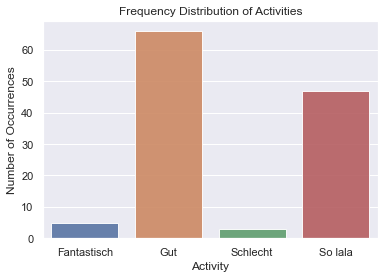

In [10]:
# categorical data: surface_id, weather_condition_id, sport_type_id
activity_map = {'sport_type_id': {'1': 'Laufen', '3': 'Radfahren', '4': 'MTB', '14': 'Laufband', '18': 'Schwimmen', '19': 'Gehen', '64': '???'}}
surface_map = {'surface_id': {'1': 'Strasse', '2': 'Weg', '3': 'Gemischt', '4': 'Cross'}}
feeling_map = {'subjective_feeling_id': {'5': 'Gut', '2': 'So lala', '3': 'Fantastisch', '1': 'Schlecht', '4': 'Verletzt', '19': '', '64': ''}}
# replace the activity ids with readable values from the map
df_copy.replace(activity_map, inplace=True)
df_copy.replace(surface_map, inplace=True)
df_copy.replace(feeling_map, inplace=True)
# in Python, it's a good practice to typecase categorical features to a category type to fasten up the processing of the data
df_copy['sport_type_id'] = df_copy['sport_type_id'].astype('category')
df_copy['surface_id'] = df_copy['surface_id'].astype('category')
df_copy['subjective_feeling_id'] = df_copy['subjective_feeling_id'].astype('category')
activity_count = df_copy['subjective_feeling_id'].value_counts()
sns.set(style="darkgrid")
sns.barplot(activity_count.index, activity_count.values, alpha=0.9)
plt.title('Frequency Distribution of Activities')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Activity', fontsize=12)
plt.show()

In [52]:
# first, create a list of labels for the diagram
labels = df_copy['year'].unique().tolist()
labels.sort()
# then, get the unique values of activities
activities = df_copy['sport_type_id'].unique().tolist()
# Getting length of list
length = len(activities)
i = 0
# a dictionary t store keys and lists of values for the plot 
d = {}
# Iterating using while loop
while i < length:
    my_filter = df_copy['sport_type_id'] == activities[i]
    # d = {'<activity>' : [<list of summed up distances per activity and year]}
    d[activities[i]] = df_copy.loc[my_filter, :].groupby(by=['year'])['distance'].sum()
    print(activities[i])
    i += 1
# df_dist_per_year = df_copy.groupby(by=['year', 'sport_type_id'])[['distance']].sum()
#activity_filter = df_copy['sport_type_id'] == 'AERQ Product'
#activity_filter
#df_copy.loc[cms_filter, :].groupby(by=['Export-Datum', 'Mitarbeiter-Name'])[['Stunden']].sum()
#df_dist_per_year = df_copy.groupby(by=['year', 'sport_type_id'])['distance'].sum()
#df_dist_per_year['distance_km'] = df_dist_per_year/1000

# men_means = [20, 35, 30, 35, 27]
# women_means = [25, 32, 34, 20, 25]
# men_std = [2, 3, 4, 1, 2]
# women_std = [3, 5, 2, 3, 3]
# width = 0.35       # the width of the bars: can also be len(x) sequence

# fig, ax = plt.subplots()

# ax.bar(labels, men_means, width, yerr=men_std, label='Men')
# ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means,
#        label='Women')

# ax.set_ylabel('Scores')
# ax.set_title('Scores by group and gender')
# ax.legend()

# plt.show()
print(labels)

Laufen
Laufband
???
MTB
Schwimmen
Gehen
Radfahren
[2014, 2015, 2016, 2017, 2018, 2020, 2021]


Text(0, 0.5, 'Distance')

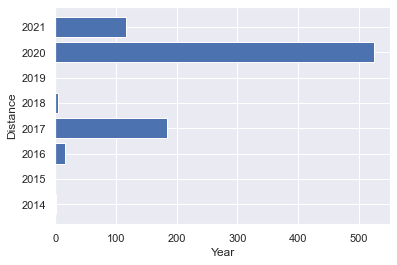

In [12]:
# use pandas Grouper to group data on a yearly base and sum distance up per year
df_dist_per_year = df_copy.groupby(['year'])[['distance']].sum()
df_dist_per_year['distance_km'] = df_dist_per_year/1000
df_dist_per_year
y_values = df_dist_per_year['distance_km']
x_values = df_dist_per_year.index
plt.barh(x_values, y_values)
plt.xlabel('Year')
plt.ylabel('Distance')